# Basic Definations

Mean: \begin{equation*}\bar{x} = \frac{\sum{x}}{n}; \bar{y} = \frac{\sum{y}}{n} \end{equation*}

Unbiased Variance: \begin{equation*} s_{x} = \frac{\sum{(x-\bar{x})}^2}{(n-1)};  s_{y} = \frac{\sum{(y-\bar{y})}^2}{(n-1)}\end{equation*}

Standard deviation: \begin{equation*} \sigma_x = \sqrt s_{x}; \sigma_y = \sqrt s_{y} \end{equation*}

Covariance: \begin{equation*} Cov(x,y) = \frac{\sum[(x-\bar{x})(y-\bar{y})]}{(n-1)}\end{equation*}

Correlation: \begin{equation*}  \frac{Cov(x,y)}{\sigma_x  \sigma_y} \end{equation*}


# Inference in Linear Regression
Linear regression attempts to model the relationship between two variables $w$ (slope), and $\epsilon$ (intercept) by fitting a linear equation to observed data. 

$$
\begin{align*}
Y = wX+\epsilon\label{eq1}
\end{align*}
$$

The goal is to find $w$ and $\epsilon$, that will minimizes the mean squared error, define below, where $Y_i$ and $Y^{\prime}_i$ are observed and fitted values. 

\begin{equation*} MSE = \frac{\sum_{i=1}^{n}{(Y_i-Y^{\prime}_i)}^2}{(n-2)}\end{equation*}


Minimizing the MSE, results into soloutions for $w$ and $\epsilon$ as follows:
 
 
\begin{equation*} w = \frac{n (\sum xy) - (\sum x)(\sum y)}{n(\sum x^2) - (\sum x)^2} = \frac{\overline{xy} - \bar{x}\bar{y}}{\overline{x^2} - (\bar{x})^2} = \frac{S_{XY}}{S_{XX}} \end{equation*}

\begin{equation*} \epsilon = \frac{\sum y \sum x^2 - \sum x \sum (xy)}{n(\sum x^2) -  (\sum x)^2} = \frac{\bar{y}\sum x^2 - \bar{x} \sum (xy)}{\sum x^2 - (\sum x)^2} = \bar{y} - w \bar{x}\end{equation*}

In this simple tutorial we will first do data exploration, then will build a predictive model using Linear Regression Algorithm, and will finally test the model. Courtesy: http://theenglishtea.company/linear-regression-for-impatient-programmer/

## First look at the data
Load the data, that has two columns of float numbers say x and y. We will first arrange data in a list of lists, such as data = [[x1,y1,], [x2,y2], ... [xN,yN]].

In [2]:
import matplotlib.pyplot as plt  # to plot the data
#import scipy as scp
from scipy import stats          # to check basic definations against our knowledge of mmea, sigma etc
import math
import numpy as np               # to handle arrays and to check definations against our knowledge of mmea, sigma etc

datafile = open("/Users/skhalil/Desktop/Analysis/DataScience/Regression/LinearData.txt",'r')
datafile.readline()
data = [ [float(word) for word in line.split()] for line in datafile.readlines()]
# find out total data entries, and print first few entries
n = float (len (data))
print('Total data entries', n)
print ('First three entries:', data[0:3])
print ('Last entry', data[-1])
# Close the data file.
datafile.close()

Total data entries 999.0
First three entries: [[6.4063, 45.8259], [1.3291, 14.6734], [11.793, 43.5116]]
Last entry [6.8878, 61.849]


## Reformatting
Lets also split the data pairs into lists of x and y, such as x = [x1, x2, .., xN], y = [y1, y2, ..., yN]

In [3]:
dataX = [XY[0] for XY in data]
dataY = [XY[1] for XY in data]
#n = float(len (dataX))
#dataX = [1, 2, 3, 4, 5, 6, 7]
#dataY = [2, 7, 8, 13, 14, 20, 19]

print(dataX[0], dataY[0])

6.4063 45.8259


## Data visualization
Lets visualize the data first. Its a good idea to write a plotting function for reusability and asthetics.

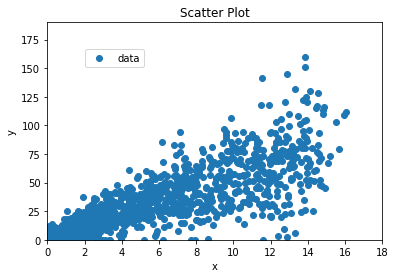

In [4]:
def scatterPlot(dataX,dataY):
        fig = plt.figure()
        ax = plt.subplot(111)
        ax.scatter(dataX, dataY,label='data')
        plt.title('Scatter Plot')
        plt.xlabel('x')
        plt.ylabel('y')
        axes = plt.gca()
        axes.set_xlim([0,18])
        axes.set_ylim([0,190])
        ax.legend(loc='upper center', bbox_to_anchor=(0.2, 0.9), shadow=False, ncol=2)
        fig.patch.set_facecolor('white') #sets the color of the border
        plt.show()
scatterPlot(dataX,dataY)        

## Basic quantities

In [5]:
#average
xbar = sum(dataX)/n
ybar = sum(dataY)/n
print("Average X: ", round(xbar,3)," Average Y: ", round(ybar,3))

# variance, sd
varianceX = sum([pow(x-xbar,2) for x in dataX])/(n-1)
varianceY = sum([pow(y-ybar,2) for y in dataY])/(n-1)
stdevX = math.sqrt(varianceX)
stdevY = math.sqrt(varianceY)
print("x variance:", round(varianceX,3), "  x standard deviation:", round(stdevX,3))
print("y variance:", round(varianceY,3), "  y standard deviation:", round(stdevY,3))

# covaraince
covariance = sum( [(x-xbar)*(y-ybar) for x,y in zip(dataX,dataY)] ) / (n-1)
correlation = covariance/(stdevX*stdevY)
print("covariance:", round(covariance,3), "  correlation:", round(correlation,3))

Average X:  6.655  Average Y:  38.072
x variance: 17.374   x standard deviation: 4.168
y variance: 759.005   y standard deviation: 27.55
covariance: 87.328   correlation: 0.76


## Basic quantities Using Numpy

In [6]:
# fun checks using numpy
varX = np.var(dataX, ddof=1)
varY = np.var(dataY, ddof=1)
print("x variance:", round(varX,3))
print("y variance:", round(varY,3))
# matrix with cov of all elements
covMatrix = np.cov(dataX, dataY, ddof=1) 
print ('covariance Matrix:\n', covMatrix)
# pick the non-diagonal value
cov = covMatrix.item((0,1))
print("covariance or correlation coeff:", round(cov,3))

x variance: 17.374
y variance: 759.005
covariance Matrix:
 [[ 17.37421638  87.32776004]
 [ 87.32776004 759.00471846]]
covariance or correlation coeff: 87.328


##  Solutions for parameters of the line equation

In [7]:
dataX2 = [x*x for x in dataX]
dataY2 = [y*y for y in dataY]
dataXY = [x*y for x,y in zip(dataX,dataY)]

w = ( n*sum(dataXY) - sum(dataX)*sum(dataY)  )/( n*sum(dataX2) - pow(sum(dataX),2)  )
e = ( sum(dataY)*sum(dataX2) - sum(dataX)*sum(dataXY) )/( n*sum(dataX2) - pow(sum(dataX),2)  )

print('w: ',round(w,3),'epsilon :',round(e,3))

w:  5.026 epsilon : 4.624


In [8]:
# fun checks using numpy

W = cov/varX
E = ybar - W*xbar 

print("w: ",round(W,3),"epsilon: ",round(E,3))

w:  5.026 epsilon:  4.624


## Draw the fitted line for some test data
Lets draw the predicted or fitted model, for x <= 20

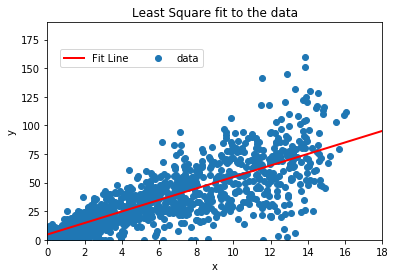

In [9]:
X = range(20)
YFit = [w*x+e for x in X]
fig = plt.figure()
ax = plt.subplot(111)
ax.scatter(dataX, dataY,label='data')
ax.plot(X, YFit, color='red', label='Fit Line',linewidth=2.0)##New: fit line
plt.title('Least Square fit to the data')
plt.xlabel('x')
plt.ylabel('y')
axes = plt.gca()
axes.set_xlim([0,18])
axes.set_ylim([0,190])
ax.legend(loc='upper center', bbox_to_anchor=(0.25, 0.9), shadow=False, ncol=2)
fig.patch.set_facecolor('white')
plt.show()

## MSE and $R^2$

Lets check the how well the model explains the data by looking at the following quantities. 

Sum of squared of errors: \begin{equation*} SS_{Residual} = \Sigma_{i}^{n} (Y_i - \hat{Y_i})^2 \end{equation*}

mean squared error: \begin{equation*} \hat{\sigma}^2 = \frac{\Sigma_i^n (Y_i - \hat{Y_i})^2}{n-2} \end{equation*}

root mean squared error (standard error): \begin{equation*} s.e = \sqrt {\hat{\sigma}^2} \end{equation*}

$R^2$: \begin{equation*} R^2 = 1.0 - \frac{SS_{Residual}}{\Sigma_{i}^{n} (Y_i - \bar{Y})^2} = 1.0 - \frac{SS_{Residual}}{(n-1) s_y}\end{equation*}

[std error on the forecasted values y^ for x](http://www.real-statistics.com/regression/confidence-and-prediction-intervals/):  \begin{equation*} \hat{\sigma} \sqrt {(\frac{1}{n} + \frac{(X - \bar{X})^2}{(n-1)s_x}) }
\end{equation*}

[std error of the prediction (fitted line)](http://www.real-statistics.com/regression/confidence-and-prediction-intervals/):  \begin{equation*} \hat{\sigma} \sqrt {(1 + \frac{1}{n} + \frac{(X - \bar{X})^2}{(n-1)s_x}) }
\end{equation*}

$R^2$ gives a measure of the goodness of the fit or percentage of the variability of y that can be explained by the regression model, and should be ideally close to 1.


In [10]:
# sum of square of residuals
SS_residuals = sum( [pow(y - (w*x+e),2) for x,y in zip(dataX,dataY) ] )

# mean squared error
mse = SS_residuals / (n-2)

# std error
std = math.sqrt(mse)
print('mse +/- std: ', round(mse,2), '+/-', round(std,2))

# mean squared deviation in y
msd_y = varY * (n-1)


# mean squared deviation in x
msd_x = varX * (n-1)
#msd_x = sum([pow(x-xbar,2) for x in dataX])

#R^2
R_squared = 1.0 - (SS_residuals/msd_y)
print('R^2:', round(R_squared, 4)) 

# std error on the forecasted values y^ for x
Y_SE = [std * np.sqrt(1./(n) + pow((x-xbar),2)/msd_x) for x in X]

#std error of the prediction 
Y_SE_pred = [ std* np.sqrt(1 + 1./n + pow((x-xbar),2)/msd_x) for x in X]

#print('Y_Fit:', YFit[0:4])
#print('Y_SE:', Y_SE[0:4])
#print('Y_SE_pred', Y_SE_pred[0:4])

mse +/- std:  320.39 +/- 17.9
R^2: 0.5783


This is pretty mediocer, as expected from a noisy system as this one. Lets plot it for all or few points. Again these are the vertical distances from the fit line.

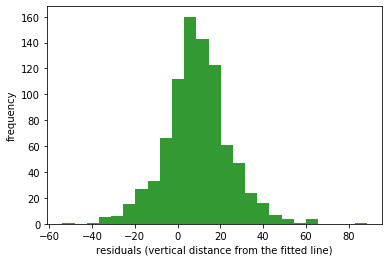

In [11]:
def hplot(data, nbins, label=''):
        fig = plt.figure()
        ax = plt.subplot(111)
        ax.hist(data,nbins,color='green',alpha=0.8)
        plt.title('')
        plt.xlabel(label)
        plt.ylabel('frequency')
        fig.patch.set_facecolor('white') #sets the color of the border
plt.show()

residuals = [y - w*x+e for x,y in zip(dataX,dataY) if (x < 12)]
hplot(residuals, 25, 'residuals (vertical distance from the fitted line)')

Lets also project the data along the fit line by finding the perpendicular distances from the points and the fit line and then making a histogram of those.

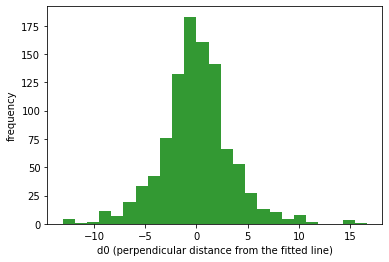

In [12]:
perp_dist = [ (y - (w*x+e))/math.sqrt(1.0+w*w) for x,y in zip(dataX,dataY) ]
hplot(perp_dist, 25, 'd0 (perpendicular distance from the fitted line)')

Using student's t-distribution single tail, for n-2 dof, lets construct the upper and lower CI (95%) on the predicted or fitted line w. r. t given data.

In [13]:
ndof = n - 2
t_crit = stats.t.ppf(1-0.05, ndof) # 1.646

y_ci_low = [yi-t_crit*yvar for yi, yvar in zip(YFit, Y_SE_pred)]
y_ci_hi = [yi+t_crit*yvar for yi, yvar in zip(YFit, Y_SE_pred)]

#print (len(y_ci_low)); print(len(y_ci_hi)); print(len(YFit))

/Users/skhalil/miniconda2/envs/Python37/lib/python3.6/site-packages/ipykernel_launcher.py:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


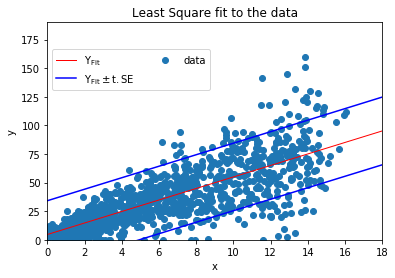

In [14]:
fig = plt.figure()
ax = plt.subplot(111)
ax.scatter(dataX, dataY,label='data')
X = range(len(y_ci_low))
YFit = [w*x+e for x in X]
ax.plot(X, YFit, color='red', label='$\mathrm{Y_{Fit}}$',linewidth=1.0)##New: fit line
ax.plot(X, y_ci_low, 'r', color='blue', label='$\mathrm{Y_{Fit}\pm t.SE}$')
ax.plot(X, y_ci_hi, 'r', color='blue' )
plt.title('Least Square fit to the data')
plt.xlabel('x')
plt.ylabel('y')
axes = plt.gca()
axes.set_xlim([0,18])
axes.set_ylim([0,190])
ax.legend(loc='upper center', bbox_to_anchor=(0.25, 0.9), shadow=False, ncol=2)
fig.patch.set_facecolor('white')
fig.show()